# Exploratory Data Analysis -1: Univariate Analysis

**Goal:** You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

## Brainstorm

### Without looking at the data, what are some of the factors that could immediately affect shipping costs?

1. Distance:
    - the further away the source and destinations are, the higher the shipping costs
2. Weight
    - the higher the weight, the more the shipping costs
3. Dimensions
    - According to USPS [1], "Dimensional Weight Pricing charges more for large packages that weigh very little."
    - Since larger packages occupy more space, they are bound to increase packaging costs
    - This is also why major companies like Apple [2] prefer to cut down on packaging sizes.
4. Fragility
    - Fragile packages need to be handled carefully and hence need more time and patience from the ground staff
5. Price of item
    - The more valuable the item is, the more it's going to cost to insure the item
6. Mode of transport
    - air transportation being the most expensive, followed by water and then land

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
train_df = pd.read_csv(
    "data/train.csv", parse_dates=["Scheduled Date", "Delivery Date"]
)

<IPython.core.display.Javascript object>

## Data

### Data Description

The columns provided in the dataset are as follows:

| Column name           	| Description                                                                                                                                      	|
|-----------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------	|
| Customer Id           	| Represents the unique identification number of the customers                                                                                     	|
| Artist Name           	| Represents the name of the artist                                                                                                                	|
| Artist Reputation     	| Represents the reputation of an artist in the market (the greater the   reputation value, the higher the reputation of the artist in the market) 	|
| Height                	| Represents the height of the sculpture                                                                                                           	|
| Width                 	| Represents the width of the sculpture                                                                                                            	|
| Weight                	| Represents the weight of the sculpture                                                                                                           	|
| Material              	| Represents the material that the sculpture is made of                                                                                            	|
| Price Of Sculpture    	| Represents the price of the sculpture                                                                                                            	|
| Base Shipping Price   	| Represents the base price for shipping a sculpture                                                                                               	|
| International         	| Represents whether the shipping is international                                                                                                 	|
| Express Shipment      	| Represents whether the shipping was in the express (fast) mode                                                                                   	|
| Installation Included 	| Represents whether the order had installation included in the purchase of   the sculpture                                                        	|
| Transport             	| Represents the mode of transport of the order                                                                                                    	|
| Fragile               	| Represents whether the order is fragile                                                                                                          	|
| Customer Information  	| Represents details about a customer                                                                                                              	|
| Remote Location       	| Represents whether the customer resides in a remote location                                                                                     	|
| Scheduled Date        	| Represents the date when the order was placed                                                                                                    	|
| Delivery Date         	| Represents the date of delivery of the order                                                                                                     	|
| Customer Location     	| Represents the location of the customer                                                                                                          	|
| Cost                  	| Represents the cost of the order                                                                                                                 	|

In [3]:
train_df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


<IPython.core.display.Javascript object>

In [4]:
train_df.head(1).T

,0
Customer Id,fffe3900350033003300
Artist Name,Billy Jenkins
Artist Reputation,0.26
Height,17.0
Width,6.0
Weight,4128.0
Material,Brass
Price Of Sculpture,13.91
Base Shipping Price,16.27
International,Yes


<IPython.core.display.Javascript object>

## Univariate Analysis

### Eliminating Unnecessary Variables

#### `Artist Name`

In [5]:
train_df["Artist Name"].value_counts()

John Brown           4
Robert Davis         3
James White          3
James Moore          3
James Cannon         2
                    ..
Peter Laine          1
Chery Reed           1
William Mccormick    1
Kara Mcneal          1
Jillian Cubbage      1
Name: Artist Name, Length: 6449, dtype: int64

<IPython.core.display.Javascript object>

There's no noticeable consistency in the artist's name; therefore, it's unlikely that this variable is likely to drive any insights.

#### `Customer Information`

In [6]:
train_df["Customer Information"].value_counts()

Working Class    4803
Wealthy          1697
Name: Customer Information, dtype: int64

<IPython.core.display.Javascript object>

It's unlikely that a working class customer would be charged differently from a wealthy customer. Regardless, we'll keep this variable for now.

So far the only variable we'll be eliminating is:
- `Artist Name`

### Distributions

In [7]:
def normal_and_qqplot(df, colname):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=150)

    sns.histplot(df[colname], kde=True, ax=ax[0])

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(data=df.loc[~df[colname].isna(), colname])

    # plot with the distribution
    ax[0].legend(
        ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)],
        loc="best",
    )
    ax[0].set_ylabel("Frequency")
    ax[0].grid()

    # Probablity plot
    sm.qqplot(data=df[colname], line="45", ax=ax[1])
    ax[1].grid()
    plt.show()

<IPython.core.display.Javascript object>

#### `Artist Reputation`

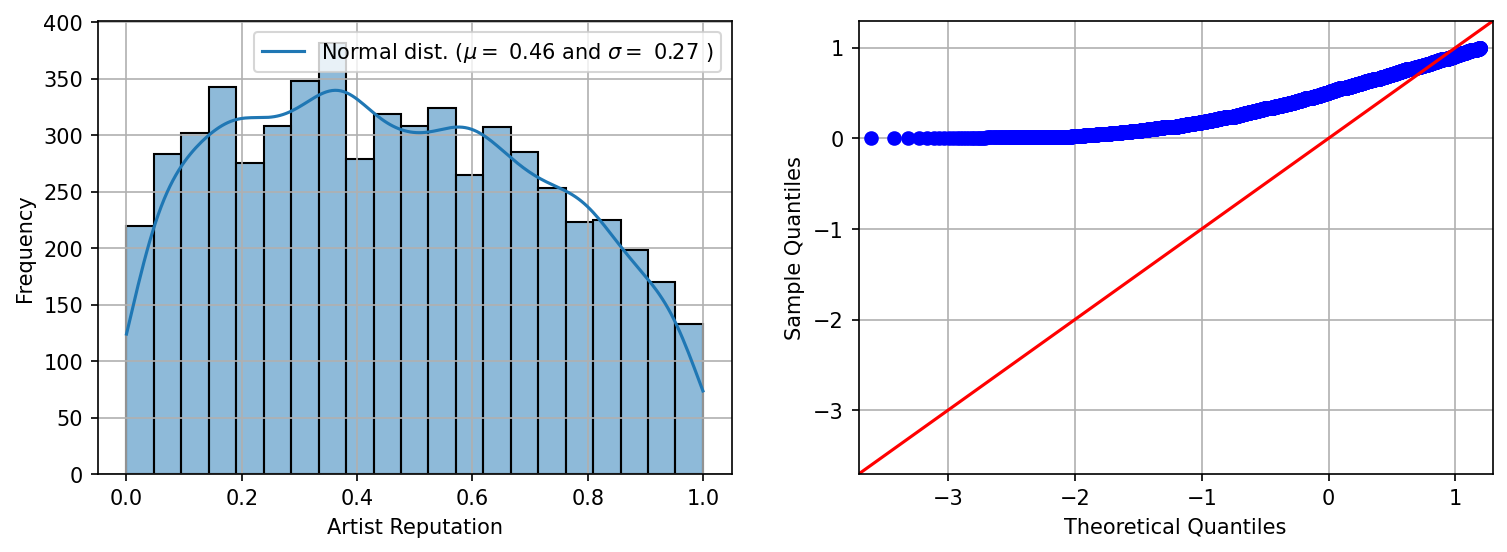

<IPython.core.display.Javascript object>

In [8]:
normal_and_qqplot(train_df, "Artist Reputation")

#### `Height`

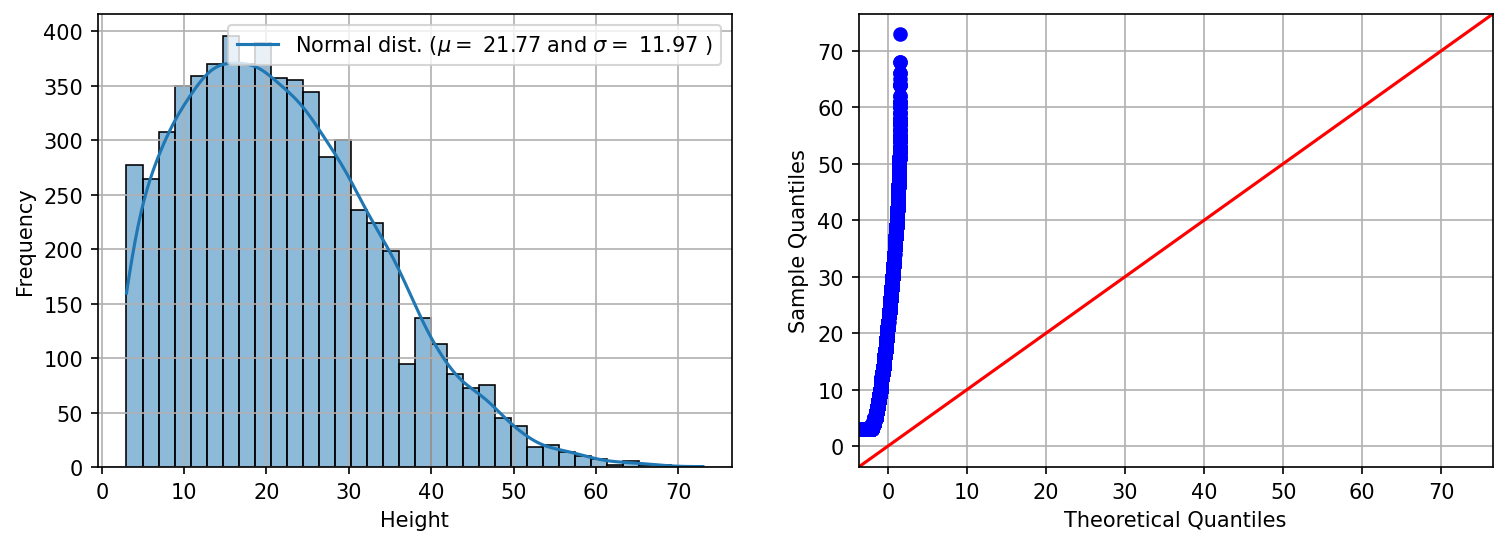

<IPython.core.display.Javascript object>

In [9]:
normal_and_qqplot(train_df, "Height")

#### `Width`

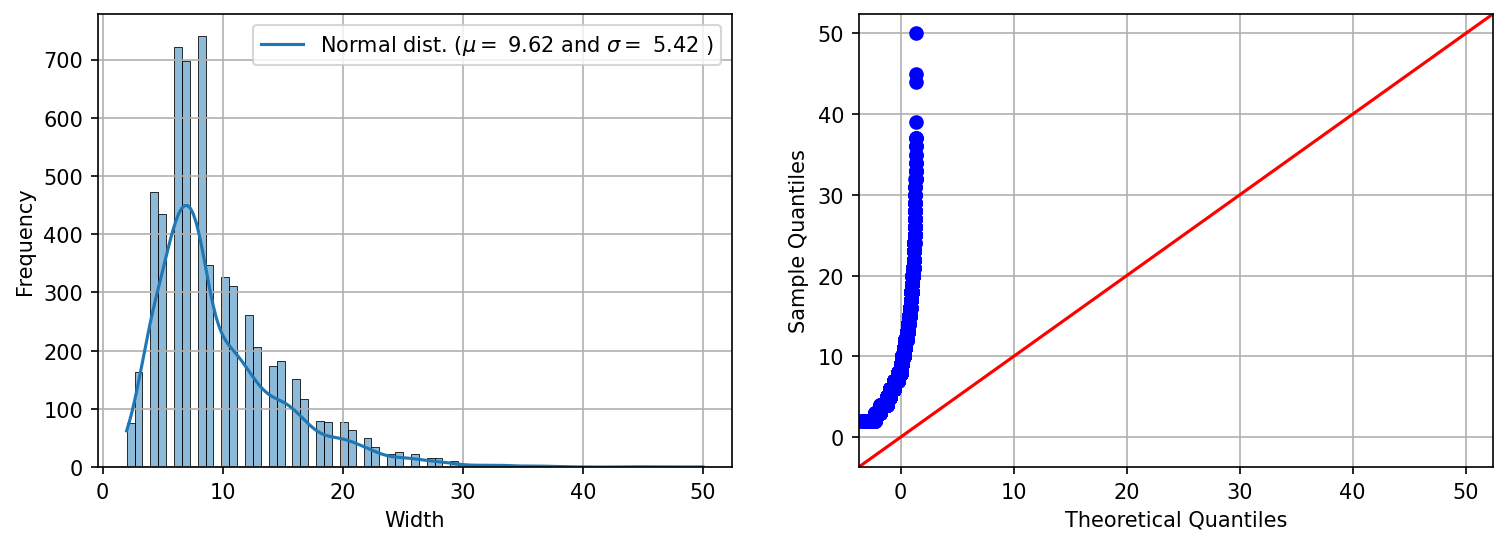

<IPython.core.display.Javascript object>

In [10]:
normal_and_qqplot(train_df, "Width")

#### `Weight`

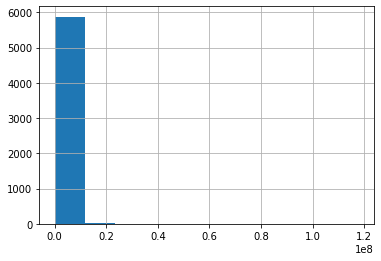

<IPython.core.display.Javascript object>

In [11]:
plt.hist(train_df["Weight"])
plt.grid()
plt.show()

In [12]:
train_df["Weight"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    5.913000e+03
mean     4.006948e+05
std      2.678081e+06
min      3.000000e+00
10%      1.392000e+02
25%      5.030000e+02
50%      3.102000e+03
75%      3.645600e+04
90%      4.095602e+05
95%      1.430595e+06
99%      8.305991e+06
max      1.179279e+08
Name: Weight, dtype: float64

<IPython.core.display.Javascript object>

Majority of the weights are within `4.095602e+05`, with a steep increase after the 95th percentile. The distribution of weights has a heavy left tail. 

#### `Material`

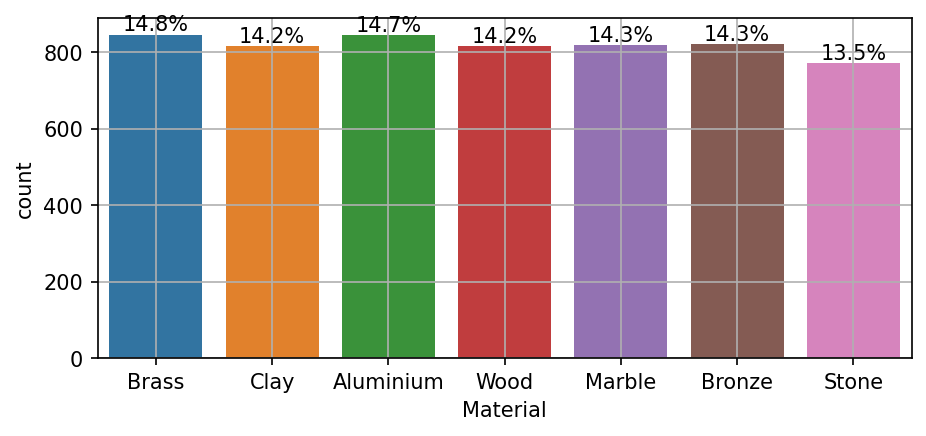

<IPython.core.display.Javascript object>

In [13]:
f, ax = plt.subplots(figsize=(7, 3), dpi=150)
c = sns.countplot(x="Material", data=train_df, ax=ax)
ncount = train_df["Material"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

All materials are more or less equally distributed. There is no imbalance.

#### `Price Of Sculpture`

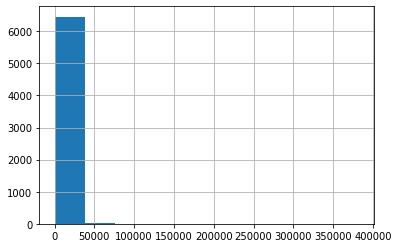

<IPython.core.display.Javascript object>

In [14]:
plt.hist(train_df["Price Of Sculpture"])
plt.grid()
plt.show()

#### `Base Shipping Price`

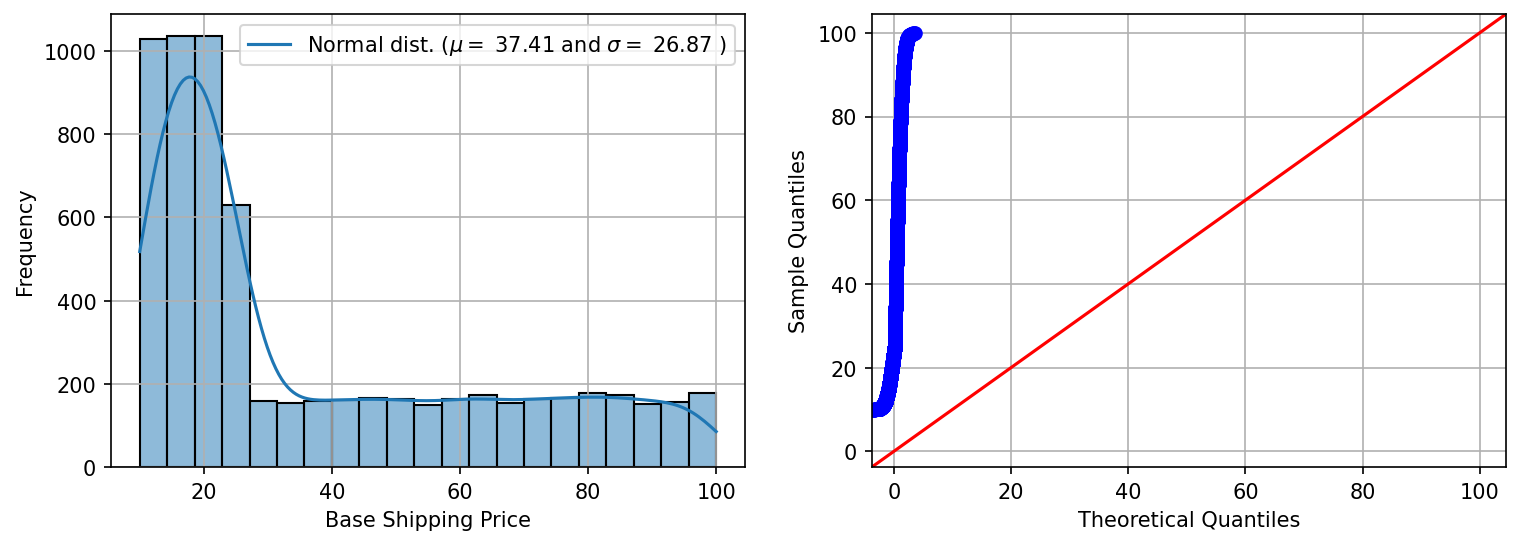

<IPython.core.display.Javascript object>

In [15]:
normal_and_qqplot(train_df, "Base Shipping Price")

The shipping price is heavily left skewed with a long left tail.

#### `International`

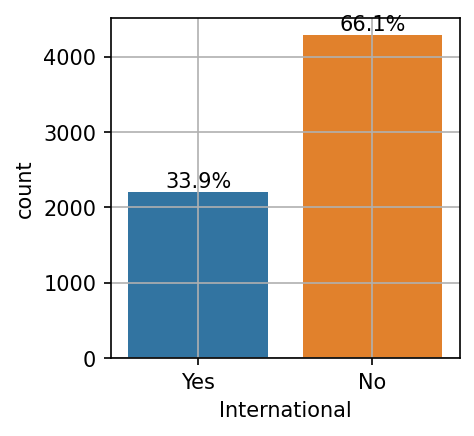

<IPython.core.display.Javascript object>

In [16]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="International", data=train_df, ax=ax)
ncount = train_df["International"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment is not International.

#### `Express Shipment`

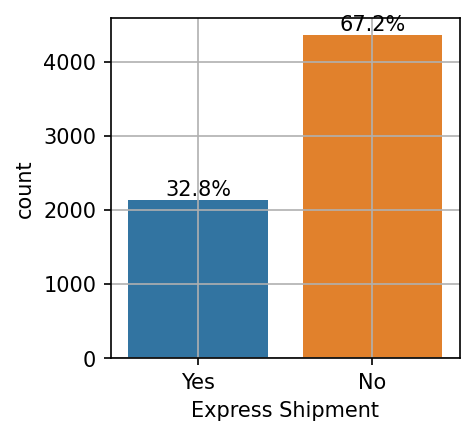

<IPython.core.display.Javascript object>

In [17]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Express Shipment", data=train_df, ax=ax)
ncount = train_df["Express Shipment"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment is not Express Shipment.

#### `Installation Included`

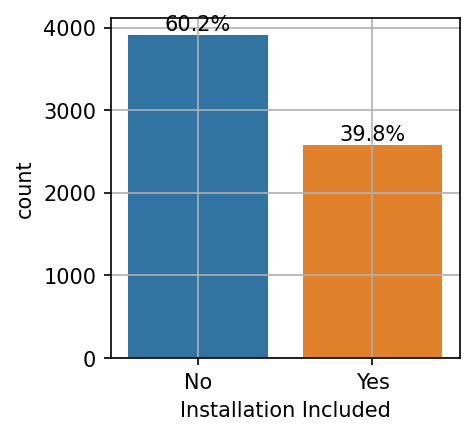

<IPython.core.display.Javascript object>

In [18]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Installation Included", data=train_df, ax=ax)
ncount = train_df["Installation Included"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment does have installation included.

#### `Transport`

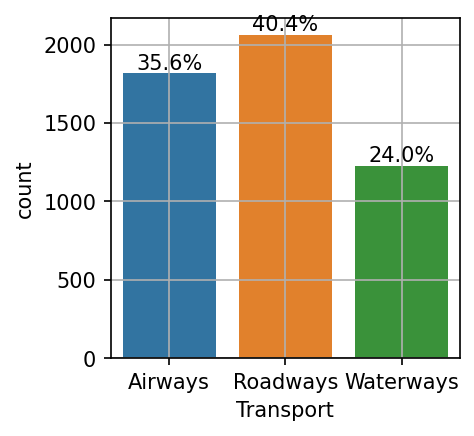

<IPython.core.display.Javascript object>

In [19]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Transport", data=train_df, ax=ax)
ncount = train_df["Transport"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

#### `Fragile`

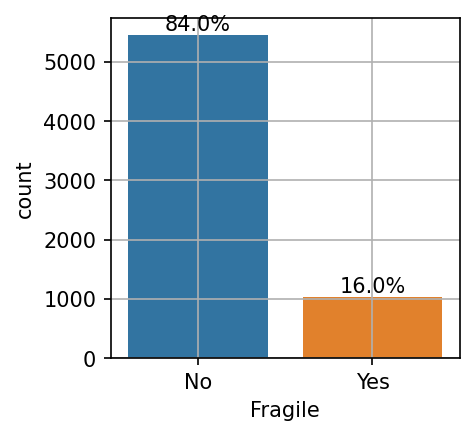

<IPython.core.display.Javascript object>

In [20]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Fragile", data=train_df, ax=ax)
ncount = train_df["Fragile"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment isn't Fragile.

#### `Customer Information`

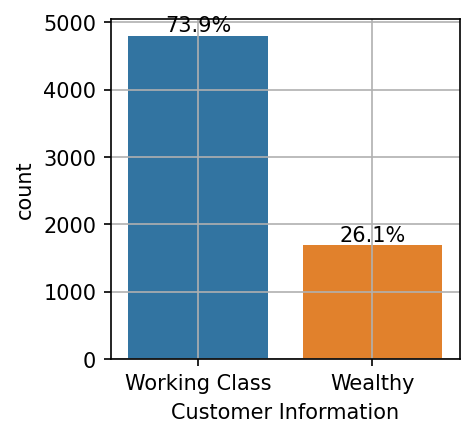

<IPython.core.display.Javascript object>

In [21]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Customer Information", data=train_df, ax=ax)
ncount = train_df["Customer Information"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment is from a working class customer base.

#### `Remote Location`

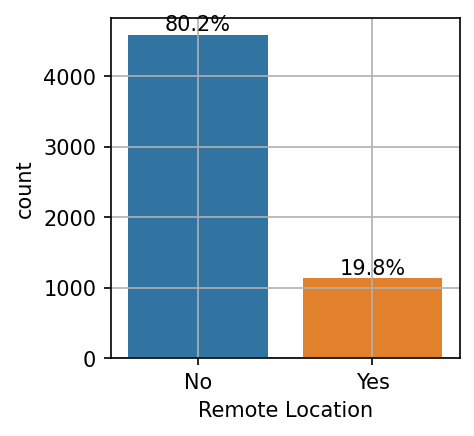

<IPython.core.display.Javascript object>

In [22]:
f, ax = plt.subplots(figsize=(3, 3), dpi=150)
c = sns.countplot(x="Remote Location", data=train_df, ax=ax)
ncount = train_df["Remote Location"].count()
for p in c.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    c.annotate(
        "{:.1f}%".format(100.0 * y / ncount), (x.mean(), y), ha="center", va="bottom"
    )
plt.grid()

A larger proportion of the shipment is from within the country.

#### `Customer Location`

In [23]:
train_df["Customer Location"].value_counts()

New Jaredstad, MD 78431      1
Victoriaborough, ME 07618    1
Gilbertberg, NM 90487        1
Paulburgh, AZ 60794          1
FPO AE 08389                 1
                            ..
Jamesport, NE 91595          1
Port Parker, NJ 56119        1
Lake Christy, RI 71022       1
Natalieburgh, NY 41609       1
Spencerhaven, ND 72699       1
Name: Customer Location, Length: 6500, dtype: int64

<IPython.core.display.Javascript object>

There is no pattern here, but we can use this data to identify the distance of the customer from a hub by geocoding them.

#### `Cost`

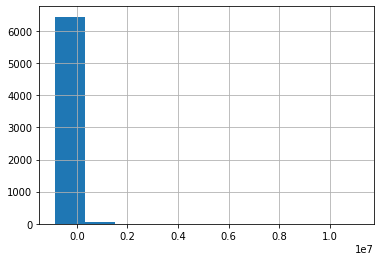

<IPython.core.display.Javascript object>

In [24]:
plt.hist(train_df["Cost"])
plt.grid()
plt.show()

In [25]:
train_df["Cost"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    6.500000e+03
mean     1.713920e+04
std      2.406579e+05
min     -8.801727e+05
10%     -1.182410e+02
25%      1.884400e+02
50%      3.820650e+02
75%      1.156115e+03
90%      5.320504e+03
95%      1.854388e+04
99%      2.525560e+05
max      1.114343e+07
Name: Cost, dtype: float64

<IPython.core.display.Javascript object>

The cost is has a long left tail, with some costs in negatives.

## References

1. [All About USPS Dimensional Weight Pricing](https://stamps.custhelp.com/app/answers/detail/a_id/6114/~/all-about-usps-dimensional-weight-pricing)
2. [Apple’s Paper and Packaging Strategy](https://www.apple.com/environment/pdf/Packaging_and_Forestry_September_2017.pdf)
3. [qqplot (Quantile-Quantile Plot) in Python](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/)
4. [How to Transform Data to Better Fit The Normal Distribution](https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/)
5. [Seaborn: countplot() with frequencies](https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies)